<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 3*

# 📝 Assignment

# 신뢰구간

서울시 기간별 시간평균 대기환경 정보 데이터셋을 이용합니다.

<img src='https://user-images.githubusercontent.com/6457691/89852263-740add80-dbc9-11ea-9e6b-8059b3f7e479.png'>

<https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do>

### 20년 3월의 송파구 데이터만 사용합니다.



## 1. 데이터셋을 불러오세요

  - 데이터는 `df`라는 변수에 저장되어야 하며
  - Feature로는 `측정일시`, `측정소명`, `오존(ppm)` 만 사용합니다.

In [1]:
import pandas as pd

df_raw = pd.read_csv('./data.csv', encoding='cp949', usecols=['측정일시', '측정소명', '오존(ppm)'])
df = df_raw[df_raw['측정소명'] == '송파구']
df

,측정일시,측정소명,오존(ppm)
24,202003312300,송파구,0.020
49,202003312200,송파구,0.021
73,202003312100,송파구,0.025
99,202003312000,송파구,0.032
124,202003311900,송파구,0.034
...,...,...,...
18499,202003010400,송파구,0.002
18524,202003010300,송파구,0.002
18547,202003010200,송파구,0.002
18573,202003010100,송파구,0.002


## 2. 데이터셋으로 부터 2개의 샘플을 생성하세요.

- `s1`에 저장된 1개는 20개의 데이터, `s2`에 저장된 다른 1개는 200개이며 
- 두 경우 모두 `random_state`로 `42`를 설정합니다.

In [2]:
import numpy as np

s1 = df.sample(20, random_state=42)
s2 = df.sample(200, random_state=42)

s1['오존(ppm)'][9199]
s2['오존(ppm)'][4372]

0.044

## 3. 두 샘플데이터에 대해서 `오존(ppm)`항목의 표본 평균을 계산하세요.

In [3]:
s1_std = np.std(s1['오존(ppm)'])
s2_std = np.std(s2['오존(ppm)'])
s1_std, s2_std

(0.013931528990028337, 0.013688447684087484)

## 4. 위에서 추정한 값들을 바탕으로, 95%에 해당하는 신뢰구간을 `CI1과` `CI2`에 계산하세요.

  - `ddof`는 `1`을 사용합니다.

In [4]:
from scipy import stats

def confidence_interval(data, confidence = 0.95):
    
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)

    stderr = stats.sem(data) 

    interval = stderr * stats.t.ppf( (1 + confidence) / 2 , n - 1)
    return (mean - interval, mean + interval)

In [5]:
CI1 = confidence_interval(s1['오존(ppm)'])
CI1

(0.015060460813957323, 0.028439539186042674)

In [6]:
CI2 = confidence_interval(s2['오존(ppm)'])
CI2

(0.02100651526262625, 0.02483348473737375)

## 5. `plt.bar`를 사용하여 다음과 같은 신뢰구간 시각화를 그리세요.
  - 이때 보라색 선에 해당 하는 값을 `pop_mean`에 저장하세요.
  - `colors = '#4000c7'`을 사용하세요.

<img src='https://i.imgur.com/3orh30m.png'>






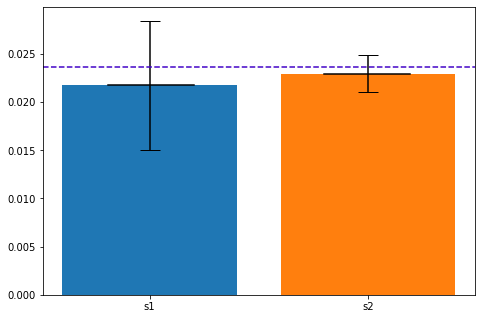

In [31]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

s1_o3 = s1['오존(ppm)']
s2_o3 = s2['오존(ppm)']

sample = ['s1', 's2']
s1_o3_mean, s2_o3_mean = np.mean(s1_o3), np.mean(s2_o3)
pop_mean = np.mean(df['오존(ppm)'])

plt.bar(x='s1', height=s1_o3_mean, yerr=CI1[0]-s1_o3_mean, capsize=10)
plt.bar(x='s2', height=s2_o3_mean, yerr=CI2[0]-s2_o3_mean, capsize=10)
plt.axhline(pop_mean, linestyle='--', color='#4000c7')
plt.axhline(s1_o3_mean, color = 'black', xmin = 0.15, xmax = 0.35)
plt.axhline(s2_o3_mean, color = 'black', xmin = 0.65, xmax = 0.85)

plt.show()